ALD Classification - 
Anthony DiBenedetto

This program uses Random Forest (rf) to classify the ALD data. The accuracy of the classification is caculated and printed out in on the of the bottom cells. Also shown is a confusion matrix of the classification to show the accuracy of the classification. 

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the training and test data
training_data = (np.load('ALD_Classification_dataset/training_data.npy'))
training_labels = (np.load('ALD_Classification_dataset/training_labels.npy'))

testing_data = (np.load('ALD_Classification_dataset/testing_data.npy'))
testing_labels = (np.load('ALD_Classification_dataset/testing_labels.npy'))

In [3]:
X_train = training_data
y_train = training_labels

X_test = testing_data
y_test = testing_labels

In [4]:
# Initialize the random forest classifier and fit the model with the training data
rfc = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, n_estimators=250,
                       random_state=42)

In [ ]:
from sklearn.tree import plot_tree
# Choose one tree from the forest
chosen_tree = rfc.estimators_[5]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, filled=True, feature_names=feature_names, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

In [5]:
# Use the model to predict 0 or 1 from the X_test
y_pred = rfc.predict(X_test)

In [6]:
# Generate the accuracy from the predicted y values (y_pred) and y_test 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Generate the confusion matrix from predicted y values (y_pred) and y_test 
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Accuracy: 99.00%
Confusion matrix:
 [[613   6]
 [  4 377]]


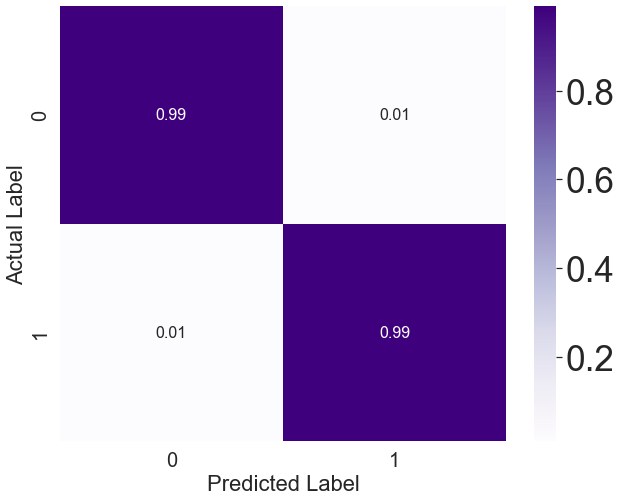

In [12]:
import seaborn as sns

# Assuming `cm` is previously defined
cm_normalized = np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2) 

# Increase the size for all fonts
sns.set(font_scale=3)  # Adjust this value to increase/decrease font size

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm_normalized, cmap="Purples", annot=True, ax=ax, annot_kws={"size": 22})  # Adjust the size in "annot_kws" for annotation fonts
ax.set_xlabel("Predicted Label", fontsize=22)  # Adjust fontsize as needed
ax.set_ylabel("Actual Label", fontsize=22)  # Adjust fontsize as needed

# Adjust the tick label size
ax.tick_params(axis='both', which='major', labelsize=20)

# Save the figure
fig.savefig("confusion_matrix.png", dpi=300)

plt.show()


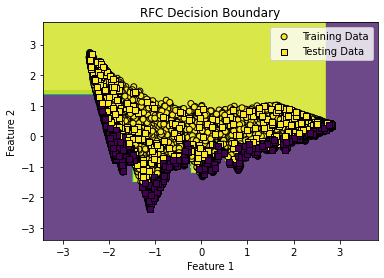

In [9]:
from sklearn.decomposition import PCA

# Reduce dataset dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train SVM classifier
classifier = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
classifier.fit(X_train_2D, y_train)

# Create a meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolors='k', marker='s', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RFC Decision Boundary')
plt.legend()

plt.show()